# Non-interacting Green function

There is no tight binding on exercise sheet 3. So I will just assume we are talking about the one in exercise sheet 5.
  Hence
  $$
    \varepsilon(\vec{k}) = -2t[\cos(k_x a) + \cos(k_y a)]
  $$
  
I will import the libraries to plot

In [1]:
using PyPlot

Here we define some of the parameters we are going to use

In [2]:
t = 1.
μ = 0.
a = 1.;

This is the function to get the energy in the tight binding model in 2 dimensions

In [3]:
ϵ(kx,ky) = -2*t*(cos(kx*a) + cos(ky*a))

ϵ (generic function with 1 method)

This is our Green function, it depends on $k$ and $\nu$

In [4]:
G(kx,ky,ν) = 1/(ν*im - ϵ(kx,ky) + μ)

G (generic function with 1 method)

Here we define a function to calculate $\nu_n$, we give a numerical value to $\beta$

In [5]:
β = 1.
ν(n) = (2*n + 1)*π/β

ν (generic function with 1 method)

Here we define a grid of $100\times100$ points (containing our Brillouin Zone in 2D) and we calculate the values of the Green function with $\nu_4$ for all the $k$ values inside the Brillouin zone

In [6]:
points = 100
X = zeros(points,points)
Y = zeros(points,points)
Z = complex(zeros(X))

domain = linspace(-π,π,points)

for i in 1:points
    X[1:end,i] = domain[i].*ones(points)
    Y[points-i+1,1:end] = domain[i].*ones(points)
end

for i in 1:points
    for j in 1:points
        Z[i,j] = G(X[i,j],Y[i,j],ν(4))
    end
end

We plot the real part of $G(k,\nu_4)$

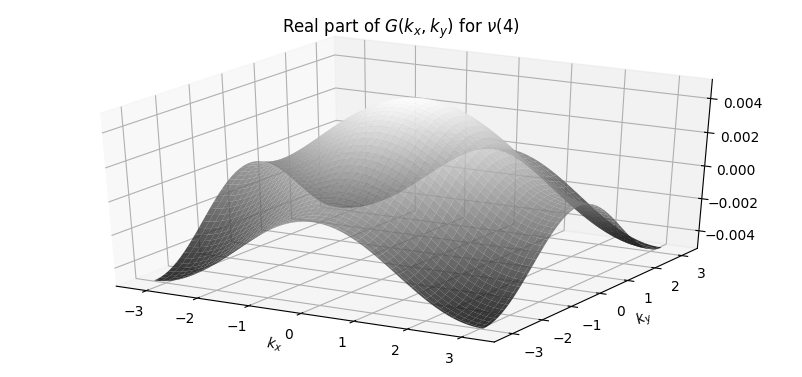

In [7]:
fig = figure("pyplot_surfaceplot",figsize=(10,10))
ax = fig[:add_subplot](2,1,1, projection = "3d")
ax[:plot_surface](X, Y, real.(Z), cmap=ColorMap("gray"), alpha=0.8, linewidth=0.25)
xlabel(L"k_x")
ylabel(L"k_y")
#axis("off")
title(L"Real part of $G(k_x,k_y)$ for $\nu(4)$")
show()

Now we plot the imaginary part

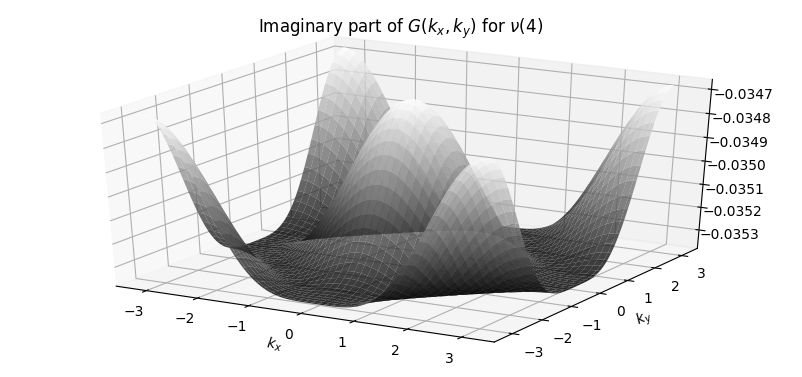

In [8]:
fig = figure("pyplot_surfaceplot",figsize=(10,10))
ax = fig[:add_subplot](2,1,1, projection = "3d")
ax[:plot_surface](X, Y, imag.(Z), cmap=ColorMap("gray"), alpha=0.8, linewidth=0.25)
xlabel(L"k_x")
ylabel(L"k_y")
#axis("off")
title(L"Imaginary part of $G(k_x,k_y)$ for $\nu(4)$")
show()

Finally we define a function to compute the local Green function, as a parameter we can also say how many k values does it want to use

In [9]:
function getLocalG(points,n)
    
    X = zeros(points,points)
    Y = zeros(points,points)

    domain = linspace(-10,10,points)

    for i in 1:points
        X[1:end,i] = domain[i].*ones(points)
        Y[points-i+1,1:end] = domain[i].*ones(points)
    end
        
    sum = complex(0.)
    
    for i in 1:points
        for j in 1:points
            sum += G(X[i,j],Y[i,j],ν(n))
        end
    end
    
    return sum/(points^2)
    
end

getLocalG (generic function with 1 method)

We compute the values of the local Green functions for $\nu_1,\ldots,\nu_{50}$

In [19]:
poles = 50
arr10 = complex(zeros(poles+1))
arr50 = complex(zeros(poles+1))
arr100 = complex(zeros(poles+1))
arr200 = complex(zeros(poles+1))
arr500 = complex(zeros(poles+1))
arr1000 = complex(zeros(poles+1))

for i in -25:25
    arr10[i+26] = getLocalG(10,i)
    arr50[i+26] = getLocalG(50,i)
    arr100[i+26] = getLocalG(100,i)
    arr200[i+26] = getLocalG(200,i)
    arr500[i+26] = getLocalG(500,i)
    arr1000[i+26] = getLocalG(1000,i)
end

We plot the values of the real (imaginary below) part of the local Green function for different number of $k$

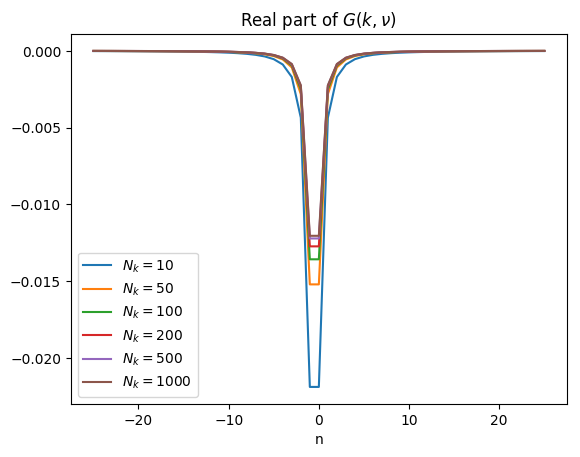

In [20]:
domain = linspace(-25,25,51)

plot(domain,real.(arr10), label=(L"N_k = 10"))
plot(domain,real.(arr50), label=(L"N_k = 50"))
plot(domain,real.(arr100), label=(L"N_k = 100"))
plot(domain,real.(arr200), label=(L"N_k = 200"))
plot(domain,real.(arr500), label=(L"N_k = 500"))
plot(domain,real.(arr1000), label=(L"N_k = 1000"))
legend(loc="best")
title(L"Real part of $G(k,\nu)$ ")
xlabel("n")
show()

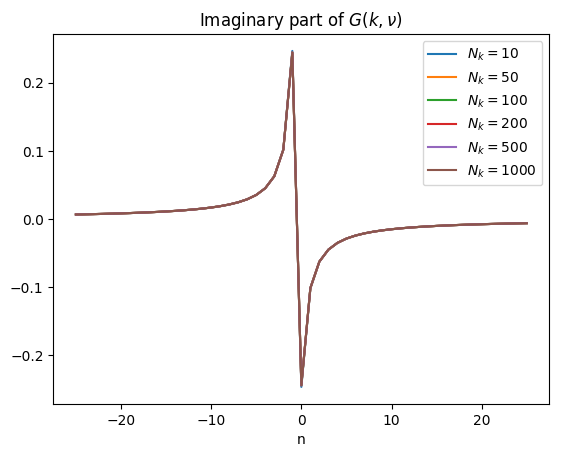

In [21]:
plot(domain,imag.(arr10), label=(L"N_k = 10"))
plot(domain,imag.(arr50), label=(L"N_k = 50"))
plot(domain,imag.(arr100), label=(L"N_k = 100"))
plot(domain,imag.(arr200), label=(L"N_k = 200"))
plot(domain,imag.(arr500), label=(L"N_k = 500"))
plot(domain,imag.(arr1000), label=(L"N_k = 1000"))
legend(loc="best")
title(L"Imaginary part of $G(k,\nu)$ ")
xlabel("n")
show()

**Check the convergence for $N_k$**

We can see that the real part seems to be already converging after 500, the imaginary part does not fluctuate.

## Questions

**Is there any symmetry that can help us?**

Yes, for the local Green function we can see that we don't need to use a lot of frequencies, so we can compute this part faster.

With respect to the Green function we can see the colormap of the values of $G(k,\nu)$ below to notice that there is a specular symmetry with respect to the x axis, and another one with respect to the y axis, this would make our calculations lighter, since we would only need 25% of the points to get the same result.

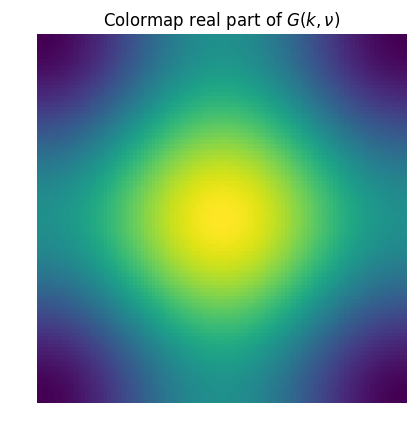

In [22]:
imshow(real.(Z))
axis("off")
title(L"Colormap real part of $G(k,\nu)$")
show()

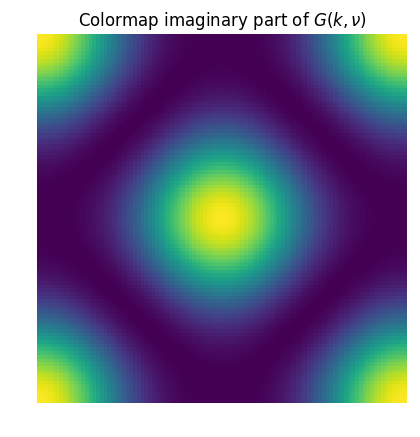

In [23]:
imshow(imag.(Z))
axis("off")
title(L"Colormap imaginary part of $G(k,\nu)$")
show()

**Do we need all Matsubara frequencies?**

No, we can just take half of them (e.g the positive ones), due to the (anti)symmetry of the local Green function